<a href="https://colab.research.google.com/github/johnnykoo84/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












# Part I Replicate the lesson code

## Make Explanatory Visualization
### Objectives
- what are continuous and categorical variables? Using pandas built-in ploting funcitionality.
- Learn about various types of pandas plots using matplotlib
- use matplotlib to visualize ddistributions and relationships with continuous and categorical variables
- imitate a real-world example

### What are categorical, discrete and continuous variables?
- Categorical variables contain a finite number of categories or destinct groups. Categorical data might not have a logical order. For ecample, categorical predictors include gender, material type and payment method. 
- Discrete variables are numeric variables that have a countable number of values between any two values. A discrete variable is always numeric. For example, the number of customer complaints or the number of flaws or defects. 
- Continuous variables are numeric variables that have an infinite number of values between any two values. A continuous variable can be numeric or date/time. For example, the length of a part or the date and time a payent is received. 

Here is a good link for cheatsheet

![visual vocabulary](https://raw.githubusercontent.com/ft-interactive/chart-doctor/master/visual-vocabulary/poster.png)

In [0]:
## Imports.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# use the 'magic' symbol (%) to specify some non-python code (i.e., affects the underlying jupyter kernel).
%matplotlib inline
'''
That line is only for jupyter notebooks, and allows plt figures to show up in your noteboook.
if you are using another editor, you'll use: 
 plt.show() 
at the end of all your plotting commands to have the figure pop up in another window.
'''
# I'm using jupyter notebook (colab)

"\nThat line is only for jupyter notebooks, and allows plt figures to show up in your noteboook.\nif you are using another editor, you'll use: \n plt.show() \nat the end of all your plotting commands to have the figure pop up in another window.\n"

In [0]:
# Specify the 'plot style' we want to use with pandas and matplotlib
plt.style.use('fast') 
# "fast" is actually the default style, so you don't necessarily have to set it.

In [4]:
# List of other available plot styles you can use instead of "fast".
plt.style.available

['tableau-colorblind10',
 'seaborn-muted',
 'seaborn',
 'dark_background',
 'grayscale',
 'seaborn-paper',
 'seaborn-ticks',
 'classic',
 'seaborn-white',
 'seaborn-bright',
 '_classic_test',
 'seaborn-pastel',
 'seaborn-poster',
 'bmh',
 'seaborn-darkgrid',
 'seaborn-notebook',
 'seaborn-dark',
 'seaborn-dark-palette',
 'fivethirtyeight',
 'seaborn-deep',
 'Solarize_Light2',
 'fast',
 'seaborn-colorblind',
 'seaborn-talk',
 'ggplot',
 'seaborn-whitegrid']

## Continuous vs Categorical variables

In [5]:
# Read in the titanic dataset
url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'
df = pd.read_csv(url)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [6]:
# cabin class is a categorical variable
# it can be displayed using either number or string values.
df['cabin_class'] = df['Pclass'].map({1: 'first', 2: 'second', 3: 'third'})
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class
0,0,3,male,22.0,7.2500,Southampton,third
1,1,1,female,38.0,71.2833,Cherbourg,first
2,1,3,female,26.0,7.9250,Southampton,third
3,1,1,female,35.0,53.1000,Southampton,first
4,0,3,male,35.0,8.0500,Southampton,third


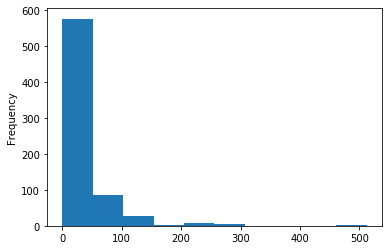

In [7]:
# Fare is a continuous variable, so we can display it with a histogram
df['Fare'].plot(kind='hist');

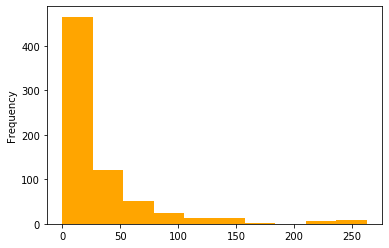

In [10]:
# Remove two extreme outliers
df = df[df['Fare'] < 500]
df['Fare'].plot(kind='hist', color='orange')

In [12]:
# A continuous variable can be converted to a categorical var using binning.
farebins = [0, 8, 15, 33, 512]
farelabels = ['low', 'medium', 'high', 'vhigh']
df['fare_groups'] = pd.cut(df['Fare'], bins=farebins, labels=farelabels)
myresults = df['fare_groups'].value_counts().sort_index()
myresults

low       154
medium    189
high      185
vhigh     174
Name: fare_groups, dtype: int64

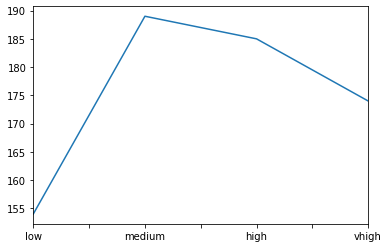

In [15]:
# sometimes it's important to specify the range of your y-axis to get more accurate results. 'lim'='limits'
myresults.plot();
# so looking at the plot below, one can misunderstand low is close to zero but it isn't

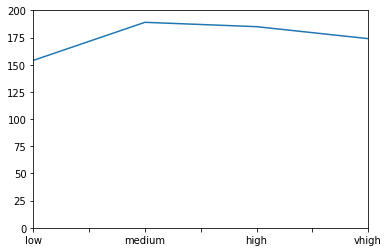

In [16]:
# this plot will tell the truth
myresults.plot(ylim=(0,200));

## Displah a single continuous variable

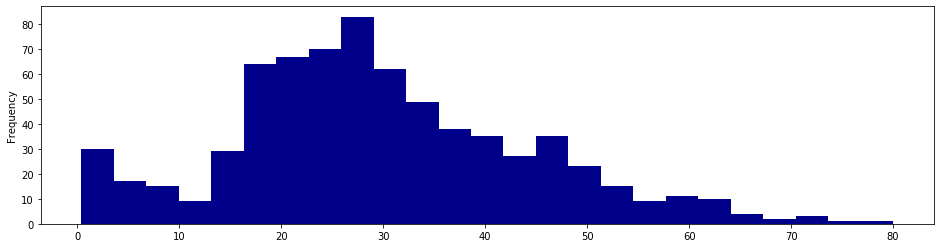

In [18]:
# Histogram
# this plot will show the age distribution
df['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='darkblue');

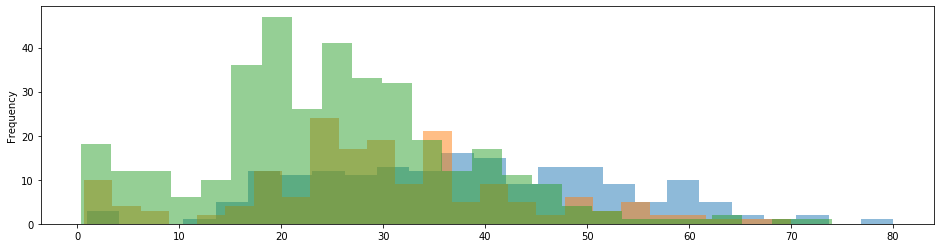

In [19]:
# Stacked Histogram of continuous variable, broken out by categorical variable
df[df['Pclass']==1]['Age'].plot(kind='hist', bins=25, figsize=(16,4), alpha=0.5)
df[df['Pclass']==2]['Age'].plot(kind='hist', bins=25, figsize=(16,4), alpha=0.5)
df[df['Pclass']==3]['Age'].plot(kind='hist', bins=25, figsize=(16,4), alpha=0.5);
# i don't understand how pandas automatically (or randomly) pick the color for each plot

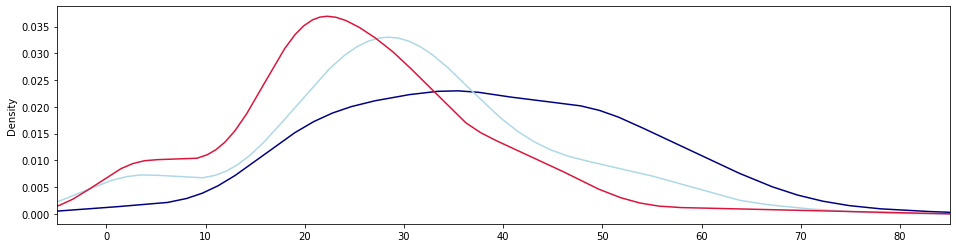

In [20]:
# But this is actually easier to read using a Kernel Density Estimate (KDE). Note the use of 'xlim'.
df[df['Pclass']==1]['Age'].plot(kind='density', xlim=(-5, 85), figsize=(16,4), color='navy')
df[df['Pclass']==2]['Age'].plot(kind='density', xlim=(-5, 85), figsize=(16,4), color='lightblue')
df[df['Pclass']==3]['Age'].plot(kind='density', xlim=(-5, 85), figsize=(16,4), color='crimson');

## Display a single categorical variable

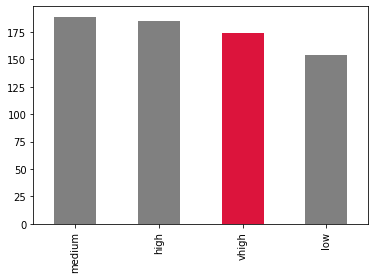

In [21]:
# Bar chart. Use colors to make a particular value 'pop'!
df['fare_groups'].value_counts().plot(kind='bar', color=['gray', 'gray', 'crimson', 'gray']);

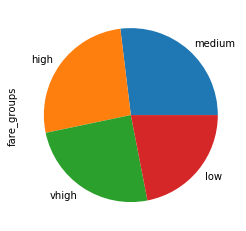

In [23]:
# Pie chart - Austin in the lecture specifically disliked pie chart.
# Think why and be able to explain
df['fare_groups'].value_counts().plot(kind='pie', figsize=(4,4));

## Compare two categorical variables

In [24]:
# Compare two categorical variables using crosstab
cab_death = pd.crosstab(df['cabin_class'],df['Survived'])
cab_death

Survived,0,1
cabin_class,,
first,64,117
second,90,83
third,270,85


In [28]:
# suddenely I wonder what the type of crosstab is
cab_death.info()
# so it is pandas dataframe...hmm interesting
# maybe that is why it has plot method like the other df type

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, first to third
Data columns (total 2 columns):
0    3 non-null int64
1    3 non-null int64
dtypes: int64(2)
memory usage: 72.0+ bytes


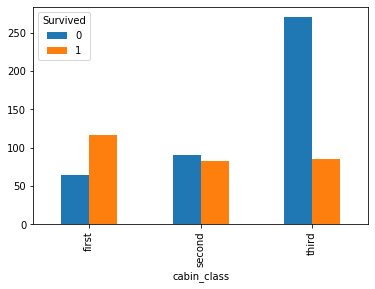

In [25]:
# Make that into a bar chart.
cab_death.plot(kind='bar');

In [30]:
# Crosstab with column percents.
# now this will show percentage values instead of the absolute values
cab_death1 = pd.crosstab(df['cabin_class'],df['Survived'], normalize='columns')
cab_death1

Survived,0,1
cabin_class,,
first,0.150943,0.410526
second,0.212264,0.291228
third,0.636792,0.298246


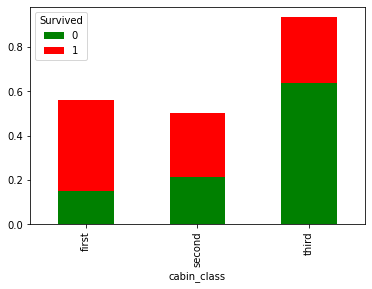

In [36]:
# make a stacked bar chart, for easy comparison of two categorical variables.
cab_death1.plot(kind='bar', stacked=True, color=['green', 'red']);
# one can tell that the higher cabin class, the more passengers sruvived. Too sad

In [37]:
# Crosstab with column percents.
cab_death2 = pd.crosstab(df['cabin_class'],df['Survived'], normalize='index')
cab_death2

Survived,0,1
cabin_class,,
first,0.353591,0.646409
second,0.520231,0.479769
third,0.760563,0.239437


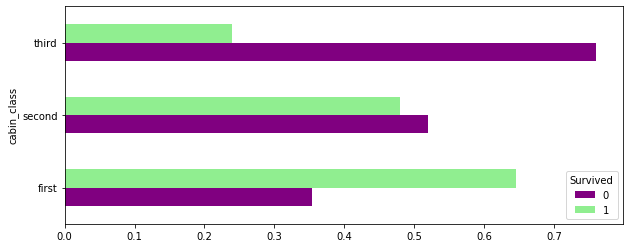

In [38]:
# A paired barchart for comparison of two categorical variables. Note the use of 'barh'.
cab_death2.plot(kind='barh', color=['purple', 'lightgreen'], figsize=(10,4));
# I like this plot compare to the one with column normalized data

## compare a categorical and continuous variable

In [39]:
# Let's look at a single continuous variable
df['Age'].mean()

29.618011283497882

In [40]:
# Now explore that continuous variable broken out by a categorical (i.e., categorical) variable.
cab_age = df.groupby('cabin_class')['Age'].mean()
cab_age

cabin_class
first     38.151492
second    29.877630
third     25.140620
Name: Age, dtype: float64

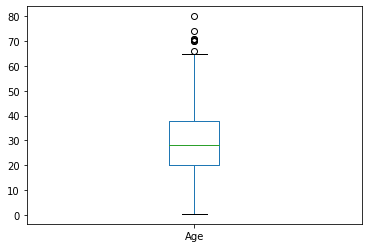

In [41]:
# To visualize a single continuous variable, you can just use `.plot` with `kind=box`
df['Age'].plot(kind='box');

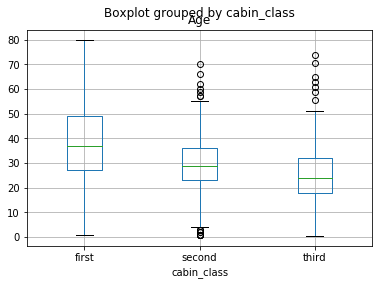

In [42]:
# But to break out a continuous variable by a categorical variable, use `.boxplot`
df.boxplot(column='Age', by='cabin_class');

## Compare two or three continuous variables

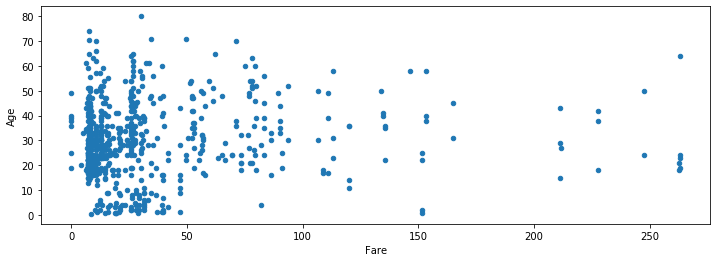

In [43]:
# Two continuous variables: age by fare
df.plot(kind = 'scatter', x='Fare', y='Age', figsize=(12,4));

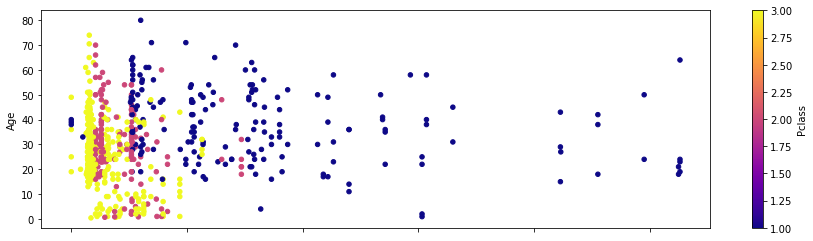

In [44]:
# Three variables: age, fare, and cabin class (color can be either continuous or categorical here).
df.plot(kind = 'scatter', x='Fare', y='Age', c='Pclass', colormap='plasma', figsize=(15,4));

## use a line plot to examine two continuous variables (often time)

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 639.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


Age
0.42     AxesSubplot(0.125,0.125;0.775x0.755)
0.67     AxesSubplot(0.125,0.125;0.775x0.755)
0.75     AxesSubplot(0.125,0.125;0.775x0.755)
0.83     AxesSubplot(0.125,0.125;0.775x0.755)
0.92     AxesSubplot(0.125,0.125;0.775x0.755)
                         ...                 
70.00    AxesSubplot(0.125,0.125;0.775x0.755)
70.50    AxesSubplot(0.125,0.125;0.775x0.755)
71.00    AxesSubplot(0.125,0.125;0.775x0.755)
74.00    AxesSubplot(0.125,0.125;0.775x0.755)
80.00    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Fare, Length: 88, dtype: object

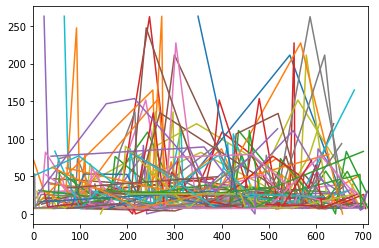

In [47]:
# line chart age by fare
df.groupby('Age')['Fare'].plot()
# wow this is messy plot let me fix this in the next line

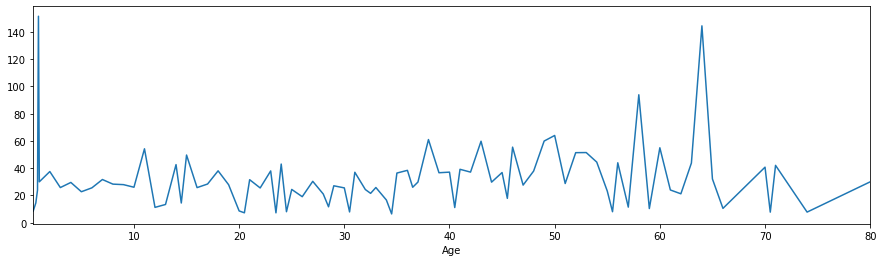

In [51]:
# line chart age by fare
df.groupby('Age')['Fare'].mean().plot(figsize=(15, 4))
# wow this is messy plot let me fix this in the next line

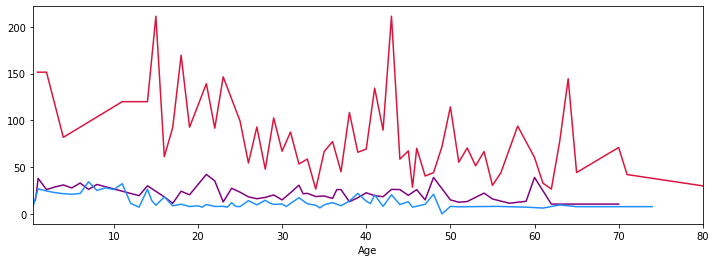

In [52]:
# Line chart: age by fare and cabin class
mycolors=['crimson', 'purple', 'dodgerblue']
# Rather than specifying 3 plots (as we did above, with the histogram) you can just loop through the values.
for x in [1,2,3]:
    df[df['Pclass']==x].groupby('Age')['Fare'].mean().plot(figsize=(12,4), color=mycolors[x-1])

## Compare multiple continuous variables

In [53]:
# Correlation Matrix
corr_matrix = df.corr()
corr_matrix

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.351579,-0.084756,0.272376
Pclass,-0.351579,1.000000,-0.365259,-0.616062
Age,-0.084756,-0.365259,1.000000,0.096573
Fare,0.272376,-0.616062,0.096573,1.000000


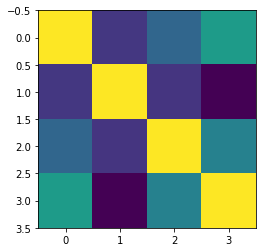

In [54]:
# Display the correlation matrix as a heatmap
plt.imshow(corr_matrix);

## it is easier and better looking with Seaborn

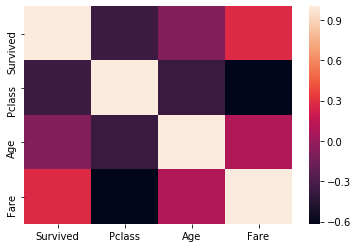

In [55]:
# More about seaborn further down.
sns.heatmap(corr_matrix);

## Intro to matplotlib
Basic example

Let's walk through a very simple example using two numpy arrays. You can also use lists, but most likely you'll be passing numpy arrays or pandas columns (which essentially also behave like arrays).

The data we want to plot:

In [0]:
import numpy as np
x = np.linspace(0, 5, 11)
y = x ** 2

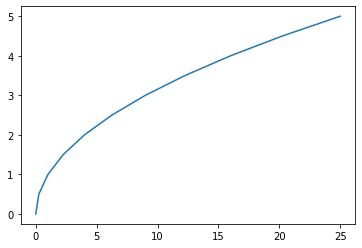

In [57]:
# a very simple plot, to get started. Notice that NO PANDAS is required!
plt.plot(y,x);

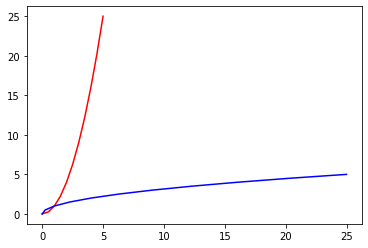

In [58]:
# You can have two 'plt' plots together (and let's add some color).
plt.plot(x, y, 'r') 
plt.plot(y, x, 'b');

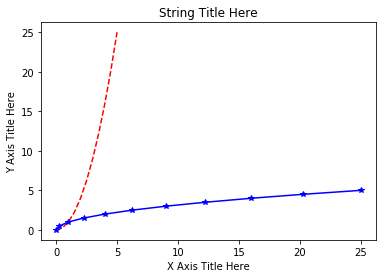

In [59]:
# Now add some labels, plus a little texture.
plt.plot(x, y, 'r--') 
plt.plot(y, x, 'b*-')
plt.xlabel('X Axis Title Here')
plt.ylabel('Y Axis Title Here')
plt.title('String Title Here');

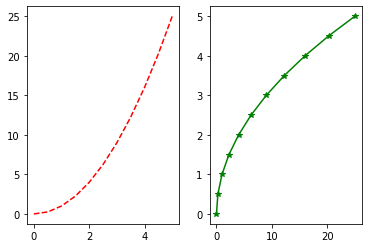

In [60]:
# The basic syntax goes like this: plt.subplot(nrows, ncols, plot_number)
plt.subplot(1,2,1)
plt.plot(x, y, 'r--') # More on color options later
plt.subplot(1,2,2)
plt.plot(y, x, 'g*-');

## Matplotlib Object Oriented Method

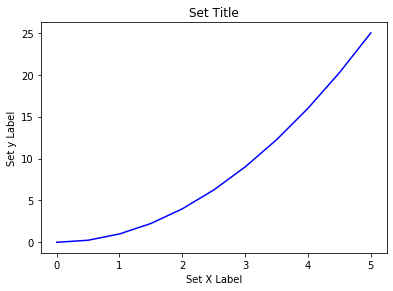

In [61]:
# Create Figure (empty canvas)
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

# Plot on that set of axes
axes.plot(x, y, 'b')
axes.set_xlabel('Set X Label') # Notice the use of set_ to begin methods
axes.set_ylabel('Set y Label')
axes.set_title('Set Title');

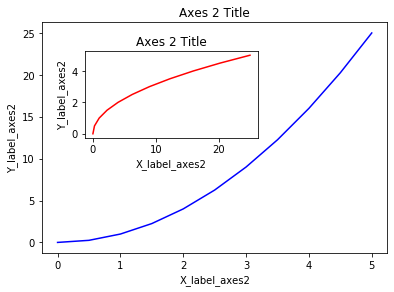

In [62]:
# Creates blank canvas
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# Larger Figure Axes 1
axes1.plot(x, y, 'b')
axes1.set_xlabel('X_label_axes2')
axes1.set_ylabel('Y_label_axes2')
axes1.set_title('Axes 2 Title')

# Insert Figure Axes 2
axes2.plot(y, x, 'r')
axes2.set_xlabel('X_label_axes2')
axes2.set_ylabel('Y_label_axes2')
axes2.set_title('Axes 2 Title');

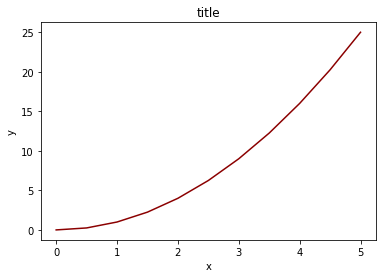

In [63]:
# Use similar to plt.figure() except use tuple unpacking to grab fig and axes
fig, axes = plt.subplots(nrows=1, ncols=1) # The default is `(1, 1)` so you don't actually have to specify this.

# Now use the axes object to add stuff to plot
axes.plot(x, y, 'darkred')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

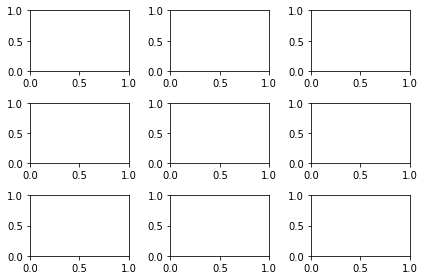

In [73]:
# Empty canvas of 1 by 2 subplots
fig, axes = plt.subplots(nrows=3, ncols=3) # the parameter labels `nrows` and `ncols` are optional.

fig    
plt.tight_layout() # more about `.tight_layout()` below.

In [69]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7867cedb38>,
      dtype=object)

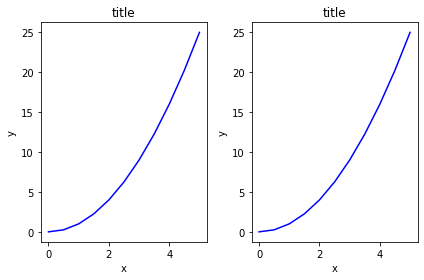

In [77]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
  ax.plot(x, y, 'b')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_title('title')
plt.tight_layout()
# Display the figure object    
# fig

AttributeError: ignored

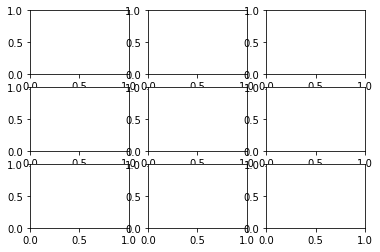

In [79]:
# I get an error with 
fig, axes = plt.subplots(nrows=3, ncols=3) # the parameter labels `nrows` and `ncols` are optional.
for ax in axes:
  ax.plot(x, y, 'b')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_title('title')
plt.tight_layout()

# and don't know why

## Figure size, aspect ratio and DPI

In [80]:
fig = plt.figure(figsize=(8,4), dpi=100)

<Figure size 800x400 with 0 Axes>

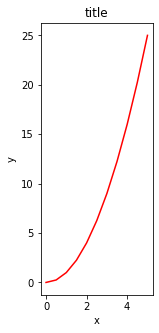

In [81]:
fig, axes = plt.subplots(figsize=(2,5))

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

## Saving Figures

In [0]:
fig.savefig("filename.png")

In [0]:
fig.savefig("filename.jpg", dpi=200)

## Legends, labels and titles

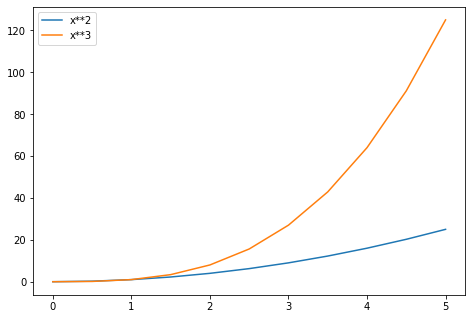

In [85]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
ax
ax.plot(x, x**2, label="x**2")
ax.plot(x, x**3, label="x**3")
ax.legend();

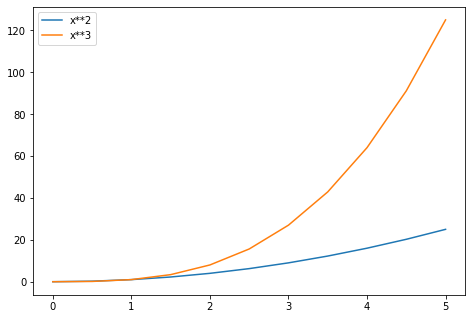

In [86]:

# Lots of options....

ax.legend(loc=1) # upper right corner
ax.legend(loc=2) # upper left corner
ax.legend(loc=3) # lower left corner
ax.legend(loc=4) # lower right corner

# .. many more options are available

# Try replacing the `loc` value with integers 1 through 10.
ax.legend() # let matplotlib decide the optimal location
fig

## Colors with Matlab like syntax

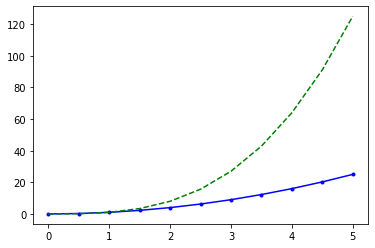

In [87]:
# MATLAB style line color and style 
fig, ax = plt.subplots()
ax.plot(x, x**2, 'b.-') # blue line with dots
ax.plot(x, x**3, 'g--') # green dashed line

## colors with color=param

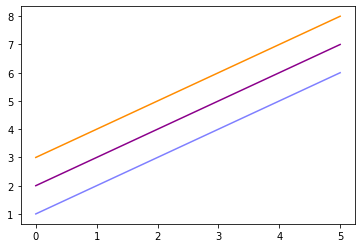

In [88]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="blue", alpha=0.5) # half-transparant
ax.plot(x, x+2, color="#8B008B")        # RGB hex code
ax.plot(x, x+3, color="#FF8C00")        # RGB hex code

## line and marker styles

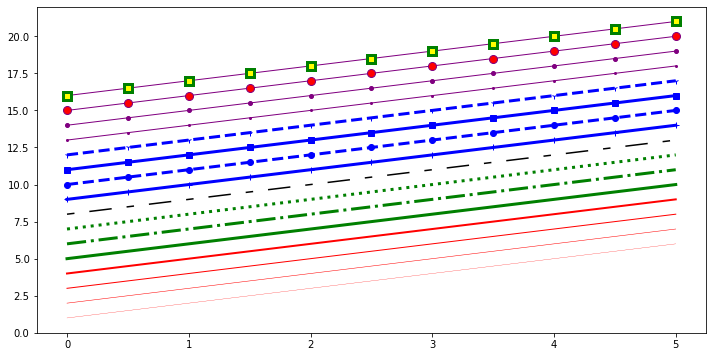

In [89]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="red", linewidth=0.25)
ax.plot(x, x+2, color="red", linewidth=0.50)
ax.plot(x, x+3, color="red", linewidth=1.00)
ax.plot(x, x+4, color="red", linewidth=2.00)

# possible linestype options ‘-‘, ‘–’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="green", lw=3, linestyle='-')
ax.plot(x, x+6, color="green", lw=3, ls='-.')
ax.plot(x, x+7, color="green", lw=3, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="blue", lw=3, ls='-', marker='+')
ax.plot(x, x+10, color="blue", lw=3, ls='--', marker='o')
ax.plot(x, x+11, color="blue", lw=3, ls='-', marker='s')
ax.plot(x, x+12, color="blue", lw=3, ls='--', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=3, markeredgecolor="green");

## Plot Range

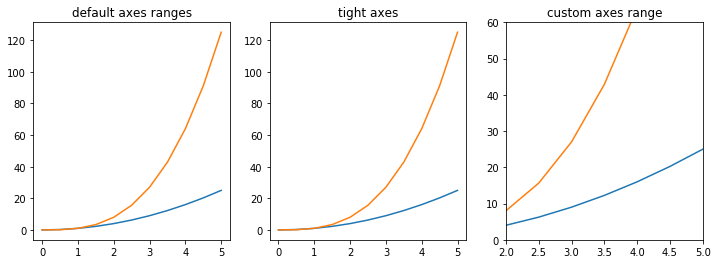

In [90]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom axes range");

## Imitate a real world exmaple

In [91]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

In [92]:
# what styles are available in matplotlib? There's one for 538.
print(plt.style.available[:5])
plt.style.use('fivethirtyeight')

['tableau-colorblind10', 'seaborn-muted', 'seaborn', 'dark_background', 'grayscale']


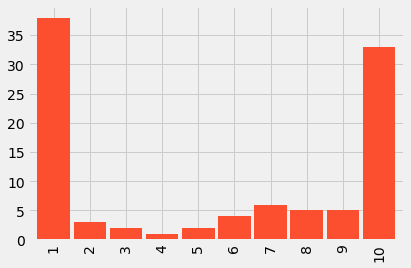

In [93]:
# Create fake data to replicate the blog post figure.
fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

fake.plot.bar(color='C1', width=0.9);

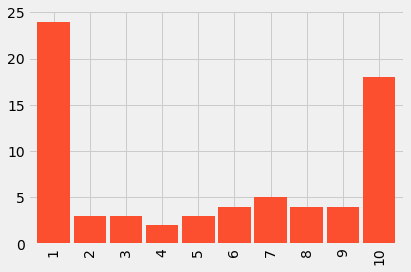

In [94]:
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9);

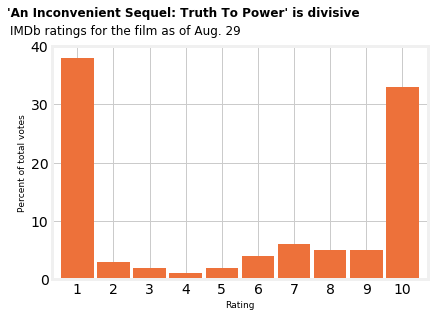

In [95]:
fig, ax = plt.subplots()
fig.patch.set(facecolor="white")

# Set the bars
fake.plot.bar(width=0.9, color="#ED713A")

ax.set(facecolor="white")

# Set the title and subtitle
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", 
             fontsize=12, 
             x=.35, 
             y=1.1,
             fontweight='bold')
ax.text(s="IMDb ratings for the film as of Aug. 29", fontsize=12, x=-1.85, y=42);

# Set the x and y axes labels
ax.set_xlabel("Rating", fontsize=9)
ax.set_ylabel("Percent of total votes", fontsize=9)

# Fix the x an y axis tick marks and grid
ax.set_xticklabels(range(1,11), rotation=0)
ax.set_yticklabels(range(0,50,10))
ax.set_yticks(range(0,50,10));

In [96]:
display(example)

## Reproduct with real data

In [0]:
# read the data from 538's github repo
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

In [0]:
# Convert timestamps strings to actual datetime objects
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [0]:
# Use the timestamp as the unique index identifier 
# so that we can select rows by timestamp
df.set_index('timestamp', inplace=True)

In [103]:
df.tail()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 23:10:05.369510,8,IMDb staff,http://www.imdb.com/title/tt6322922/ratings-im...,8.4,7.2,8,1,0,0,0,0,1,1,2,2,1,12.5,0.0,0.0,0.0,0.0,12.5,12.5,25.0,25.0,12.5
2017-08-29 23:10:05.598331,41,Top 1000 voters,http://www.imdb.com/title/tt6322922/ratings-to...,4.6,4.7,5,11,4,2,2,5,4,5,1,1,6,26.8,9.8,4.9,4.9,12.2,9.8,12.2,2.4,2.4,14.6
2017-08-29 23:10:05.794141,925,US users,http://www.imdb.com/title/tt6322922/ratings-usa,4.8,5.0,4,405,34,20,8,9,30,54,46,60,259,43.8,3.7,2.2,0.9,1.0,3.2,5.8,5.0,6.5,28.0
2017-08-29 23:10:06.022268,565,Non-US users,http://www.imdb.com/title/tt6322922/ratings-in...,6.4,6.5,7,129,11,10,8,32,47,52,37,35,204,22.8,1.9,1.8,1.4,5.7,8.3,9.2,6.5,6.2,36.1
2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [0]:
# grab only the rows corresponding to the last day
lastday = df['2017-08-29']
# but how do i know '2017-08-29' was the last day???? by looking at it?
# oh ok, so I inspected it by df.tail()

In [102]:
lastday.head()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 00:00:02.248882,1682,Males,http://www.imdb.com/title/tt6322922/ratings-male,5.3,5.3,6,671,50,29,12,42,79,107,90,83,519,39.9,3.0,1.7,0.7,2.5,4.7,6.4,5.4,4.9,30.9
2017-08-29 00:00:02.499363,257,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.3,10,53,3,4,4,4,5,14,13,26,131,20.6,1.2,1.6,1.6,1.6,1.9,5.4,5.1,10.1,51.0
2017-08-29 00:00:02.727204,15,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.5,5.3,5,7,0,0,0,1,0,1,0,0,6,46.7,0.0,0.0,0.0,6.7,0.0,6.7,0.0,0.0,40.0
2017-08-29 00:00:03.024270,13,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,5.3,5.9,7,5,0,0,0,1,0,1,0,0,6,38.5,0.0,0.0,0.0,7.7,0.0,7.7,0.0,0.0,46.2
2017-08-29 00:00:03.248207,2,Females under 18,http://www.imdb.com/title/tt6322922/ratings-fe...,1.0,1.0,1,2,0,0,0,0,0,0,0,0,0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
# get the demographic breakdowns for all IMDb users on the last day
lastday_filtered = lastday[lastday['category'] == 'IMDb users']
lastday_filtered.tail()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 22:30:06.423181,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:40:06.233659,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:50:06.592571,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:00:05.829558,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [105]:
# just grab the very last line (latest timestamp) of IMDb user ratings
# this should be the most up to date data from the dataset
final = lastday_filtered.tail(1)
final.T

timestamp,2017-08-29 23:10:06.218251
respondents,2662
category,IMDb users
link,http://www.imdb.com/title/tt6322922/ratings
average,5.4
mean,5.6
median,7
1_votes,1021
2_votes,69
3_votes,38
4_votes,25


In [106]:
# Grab only the percentage columns since we don't care about the raw 
# counts in making our graph
pct_columns = ['1_pct', '2_pct', '3_pct', '4_pct', '5_pct',
               '6_pct', '7_pct', '8_pct', '9_pct', '10_pct']
final[pct_columns].T

timestamp,2017-08-29 23:10:06.218251
1_pct,38.4
2_pct,2.6
3_pct,1.4
4_pct,0.9
5_pct,2.1
6_pct,4.1
7_pct,5.8
8_pct,5.5
9_pct,5.5
10_pct,33.7


In [107]:
# Reset the index so that it's numeric again
# and rename the percent column for easy access in our plotting
plot_data = final[pct_columns].T
plot_data.index = range(1,11)
plot_data.columns = ['percent']
plot_data

,percent
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


## generate the figure

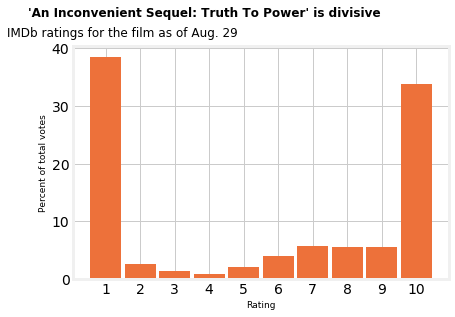

In [109]:
fig, ax = plt.subplots()

# Figure background color
fig.patch.set(facecolor="white")

# Set the bars
ax.bar(x=range(1,11), height=plot_data['percent'], width=0.9, color="#ED713A")

# Axes background color
ax.set(facecolor="white")

# Set the title and subtitle
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", 
             fontsize=12, 
             x=.35, 
             y=1.1,
             fontweight='bold')
ax.text(s="IMDb ratings for the film as of Aug. 29", fontsize=12, x=-1.85, y=42)

# Set the x and y axes labels
ax.set_xlabel("Rating", fontsize=9)
ax.set_ylabel("Percent of total votes", fontsize=9)

# Fix the x an y axis tick marks and grid
ax.set_xticklabels(range(1,11), rotation=0)
ax.set_xticks(range(1,11))
ax.set_yticklabels(range(0,50,10))
ax.set_yticks(range(0,50,10));

# Part II Reproduce another example

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.


Today I will reproduce [How Baby Boomers Get High](https://fivethirtyeight.com/features/how-baby-boomers-get-high/)

this is the plot that I will reproduce
![plot](https://fivethirtyeight.com/wp-content/uploads/2015/04/barry-jester-datalab-boomersdruguse-actual.png?w=1150)

In [0]:
## Imports.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
# Your Work Here
# I picked the data here https://fivethirtyeight.com/features/how-baby-boomers-get-high/
url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/drug-use-by-age/drug-use-by-age.csv'

In [188]:
df = pd.read_csv(url, encoding='utf-8') #without encoding option I get codec error
df.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,0.1,35.5,0.2,52.0,1.6,19.0,2.0,36.0,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,-,0.6,6.0,2.5,12.0,2.4,14.0,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,0.1,2.0,1.6,3.0,2.6,5.0,3.9,12.0,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,1.0,2.1,4.0,2.5,5.5,5.5,10.0,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,66.5,3.4,3.0,3.0,3.0,6.2,7.0,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [189]:
df

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,0.1,35.5,0.2,52.0,1.6,19.0,2.0,36.0,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,-,0.6,6.0,2.5,12.0,2.4,14.0,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,0.1,2.0,1.6,3.0,2.6,5.0,3.9,12.0,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,1.0,2.1,4.0,2.5,5.5,5.5,10.0,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,66.5,3.4,3.0,3.0,3.0,6.2,7.0,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,0.1,64.0,4.8,3.0,2.0,4.0,8.5,9.0,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,0.4,46.0,7.0,4.0,1.8,4.0,9.2,12.0,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,0.5,180.0,8.6,3.0,1.4,3.0,9.4,12.0,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,0.9,45.0,7.4,2.0,1.5,4.0,10.0,10.0,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,0.6,30.0,6.3,4.0,1.4,2.0,9.0,15.0,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [178]:
df.shape

(17, 28)

In [0]:
# drop n column which I don't know of
df = df.drop(['n'], axis=1)

In [183]:
df.tail()

,age,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
12,50-64,80.7,52.0,20.8,52.0,3.2,5.0,0.4,6.0,0.6,50.0,3.2,3.0,0.6,4.0,8.3,13.0,1.2,13.5,4.2,10.0,2.3,7.0,0.6,30.0,0.4,4.0
13,50-64,77.5,52.0,16.4,72.0,2.1,8.0,0.5,15.0,0.4,66.0,1.8,2.0,0.4,3.5,5.9,22.0,0.9,46.0,3.6,8.0,1.4,12.0,0.4,54.0,0.4,10.0
14,50-64,75.0,52.0,10.4,48.0,1.5,15.0,0.5,48.0,0.1,280.0,0.6,3.0,0.3,10.0,4.2,12.0,0.3,12.0,1.9,6.0,0.6,24.0,0.2,104.0,0.3,10.0
15,50-64,67.2,52.0,7.3,52.0,0.9,36.0,0.4,62.0,0.1,41.0,0.3,44.0,0.2,13.5,2.5,12.0,0.4,5.0,1.4,10.0,0.3,24.0,0.2,30.0,0.2,104.0
16,50-64,49.3,52.0,1.2,36.0,0.0,-,0.0,-,0.0,120.0,0.1,2.0,0.0,-,0.6,24.0,0.0,-,0.2,5.0,0.0,364.0,0.0,-,0.0,15.0


In [184]:
df.dtypes

age                         object
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object

In [0]:
condition = df['age'] == '50-64'

In [200]:
df_filtered = df[condition]
df_filtered

,age,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
15,50-64,67.2,52.0,7.3,52.0,0.9,36.0,0.4,62.0,0.1,41.0,0.3,44.0,0.2,13.5,2.5,12.0,0.4,5.0,1.4,10.0,0.3,24.0,0.2,30.0,0.2,104.0


In [0]:
df_filtered = df_filtered[['alcohol-use', 'marijuana-use', 'cocaine-use', 'crack-use', 'heroin-use', 'hallucinogen-use', 'inhalant-use', 'pain-releiver-use', 'oxycontin-use', 'tranquilizer-use', 'stimulant-use','meth-use','sedative-use']]

In [202]:
df_filtered.head()

,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
15,67.2,7.3,0.9,0.4,0.1,0.3,0.2,2.5,0.4,1.4,0.3,0.2,0.2


In [0]:
data = df_filtered.T

In [204]:
data

,15
alcohol-use,67.2
marijuana-use,7.3
cocaine-use,0.9
crack-use,0.4
heroin-use,0.1
hallucinogen-use,0.3
inhalant-use,0.2
pain-releiver-use,2.5
oxycontin-use,0.4
tranquilizer-use,1.4


In [205]:
data.shape

(13, 1)

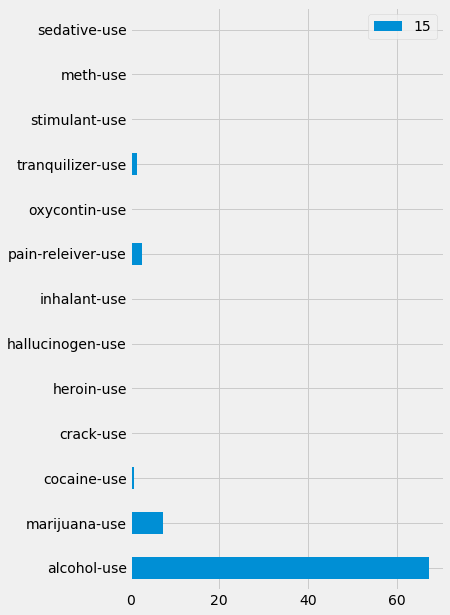

In [206]:
# let's plot barh
data.plot(kind='barh', figsize=(5, 10));

In [0]:
data.columns = ['use']

In [208]:
data

,use
alcohol-use,67.2
marijuana-use,7.3
cocaine-use,0.9
crack-use,0.4
heroin-use,0.1
hallucinogen-use,0.3
inhalant-use,0.2
pain-releiver-use,2.5
oxycontin-use,0.4
tranquilizer-use,1.4


In [0]:
data_sorted = data.sort_values(by='use', ascending=True)

In [234]:
data_sorted

,use
heroin-use,0.1
inhalant-use,0.2
meth-use,0.2
sedative-use,0.2
hallucinogen-use,0.3
stimulant-use,0.3
crack-use,0.4
oxycontin-use,0.4
cocaine-use,0.9
tranquilizer-use,1.4


In [0]:
drugs = [
         'Alcohol',
         'Marijuana',
         'Cocain',
         'Crack',
         'Heroin',
         'Hallucinogen',
         'Inhalant',
         'Pain-Releiver',
         'Oxycotin',
         'Tranquilizer',
         'Stiulant',
         'Meth',
         'Sedative'
]

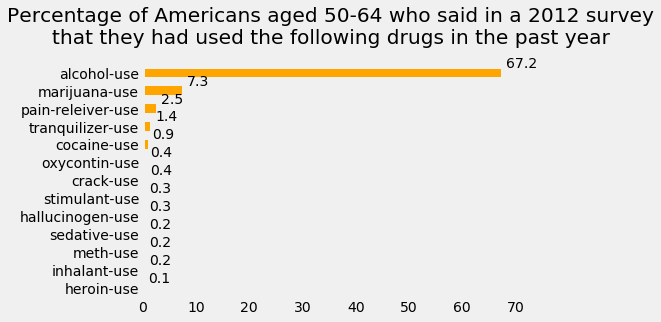

In [244]:
# simple pd plot 
ax = data_sorted.plot.barh(y='use', color='orange', legend=False)
ax.set_title('Percentage of Americans aged 50-64 who said in a 2012 survey\nthat they had used the following drugs in the past year', pad=20)
ax.grid(False)
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 10), textcoords='offset points')

In [237]:
ax.patches

In [221]:
ax

TypeError: ignored

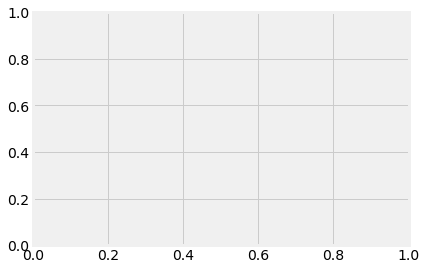

In [216]:
fig, ax = plt.subplots()

# Figure background color
fig.patch.set(facecolor="white")

# Set the bars
ax.barh(y=drugs, x=data['use'], width=0.9, color="#ED713A")

# Axes background color
ax.set(facecolor="white")

# Set the title and subtitle
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", 
             fontsize=12, 
             x=.35, 
             y=1.1,
             fontweight='bold')
ax.text(s="IMDb ratings for the film as of Aug. 29", fontsize=12)

# Set the x and y axes labels
ax.set_xlabel("Rating", fontsize=9)
ax.set_ylabel("Percent of total votes", fontsize=9)

# Fix the x an y axis tick marks and grid
# ax.set_xticklabels(range(1,11), rotation=0)
# ax.set_xticks(range(1,11))
# ax.set_yticklabels(range(0,50,10))
# ax.set_yticks(range(0,50,10));

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here